In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt
from datetime import date
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from dateutil.relativedelta import relativedelta
import os
import itertools as it
import _pickle as cPickle
import gc
import sys
from statistics import mode
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

old_err_state = np.seterr(divide='raise')
ignored_states = np.seterr(**old_err_state)

### Load Datasets: 
- News Count Data
- 1/N, 1/T Data

In [5]:
def load_cpickle_gc(filename):
    file_Name = filename
    output = open(file_Name, 'rb')

    gc.disable()

    mydict = cPickle.load(output)

    gc.enable()
    output.close()
    return mydict

In [6]:
_lambda_ = load_cpickle_gc('/Users/yiliwang/Documents/Berkeley MFE/AFP/lambda estimation/TWTR_2016-12-30_LAMBDAS')

In [7]:
NEWS = load_cpickle_gc('/Users/yiliwang/Documents/Berkeley MFE/AFP/lambda estimation/news dic/news_data')

### Process News: Convert to binary values, given a threshold 

In [9]:
def binary_news(df, threshold=1, flip = False):
    """
    convert news count dataframe into dataframe with binary values indicating news intensity, given a threshold
    
    flip == True to output no-news dataframe by flipping the binary dataframe 
    (i.e when entry value = 1 when there is no news)
    """
    df_after = df
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            df_after.iloc[i,j] = 1 if df.iloc[i,j]>=threshold else 0
    
    if flip == True:
        df_after = pd.DataFrame(np.logical_xor(df_after.values,1).astype(int),columns=df_after.columns, index=df_after.index)
    
    # reform the dataframe and column type
    df_after_ = df_after.T
    df_after_.columns = [str(i)[:10] for i in df_after_.columns]
    return df_after_

In [110]:
NEWS_binary_wiNews_df = binary_news(NEWS['TWTR']) # not flipped
NEWS_binary_woNews_df = binary_news(NEWS['TWTR'], flip = True) # flipped

In [111]:
NEWS_binary_wiNews_df.head()

,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,...,2016-11-11,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30
_time_,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10:30:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10:35:00,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10:40:00,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
10:45:00,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
10:50:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [112]:
NEWS_binary_woNews_df.head()

,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,...,2016-11-11,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30
_time_,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10:35:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10:40:00,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0
10:45:00,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
10:50:00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0


### Calculating News Adjusted Lambdas: 

1. Reshape each volume dataframe to a large dimension
2. Mute the undesired time intervals (function ` _LambdaComponent_converter_`)
3. Sum up the 1/T dataframes given a time level: daily, weekly, monthly (function ` _LambdaComponent_converter_`)

__special note__: 2016-01-04 is missing in News data. Ignore it

In [113]:
def my_reshape(df, maxsize = 200):
    if df.shape == (0,0):
        return default
    return df.reindex(np.arange(maxsize)).fillna(0).T.reindex(np.arange(maxsize)).fillna(0).T

In [114]:
# set up default dataframe with max shape
maxsize = 200
default = pd.DataFrame(np.zeros((200,200)), index = np.arange(maxsize), columns = np.arange(maxsize))

In [115]:
def nb_choice(level):
    return ['T_{}_{}_p'.format(level[0],level[1]),'T_{}_{}_n'.format(level[0],level[1]),
            'N_{}_{}_p'.format(level[0],level[1]),'N_{}_{}_n'.format(level[0],level[1])]

In [116]:
def weekly_date_slicer(DATA):
    res = []
    for i in range(int(len(DATA.keys())/5)):
        res.append(list(DATA.keys())[5*i:i*5+5])
    return res

In [117]:
# new version w/ news factor
import datetime
def _LambdaComponent_converter_(DATA, news_df, convert_to = "daily"):
    # organize data to daily level
    data = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
         for d in DATA.keys()}

    for date in DATA.keys():
        print("working on ", date)
        for time in DATA[date].keys():  
            time_str = str(datetime.timedelta(seconds=int(time)))
            for level in ['B1','B2','A1','A2']:
                for nb in nb_choice(level):
                    try:
                        if news_df[date][time_str] == 1:
                            data[date][level][nb] = data[date][level][nb] + my_reshape(DATA[date][time][level][nb])
                    except:
                        print("Missing date: ", date)
                        #sys.exit()
    if convert_to == "daily":
        return data
    week_dates = weekly_date_slicer(data)
    if convert_to == "weekly":
        start_week = [week_dates[i][0] for i in range(len(week_dates))]
        data_weekly = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
                 for d in start_week}
        for level in ['B1','B2','A1','A2']:
            for nb in nb_choice(level):
                for i in range(len(week_dates)):
                    data_weekly[week_dates[i][0]][level][nb] = data[week_dates[i][0]][level][nb]+data[week_dates[i][1]][level][nb]+data[week_dates[i][2]][level][nb]+\
                    data[week_dates[i][3]][level][nb]+data[week_dates[i][4]][level][nb]
        return data_weekly
    if convert_to == 'monthly':
        dates = pd.to_datetime(list(data.keys())).to_frame()
        dic_by_month = dates.groupby([pd.Grouper(freq = 'M')]).groups
        dic_by_month={k.month: v for k, v in dic_by_month.items()}

        data_monthly = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
                 for d in dic_by_month.keys()}

        for level in ['B1','B2','A1','A2']:
            for nb in nb_choice(level):
                for i in range(1, 12):
                    for j in range(len(dic_by_month[i])):
                        data_monthly[i][level][nb] = data_monthly[i][level][nb]+ data[str(dic_by_month[i][j])[:10]][level][nb]
        return data_monthly
    if convert_to == 'yearly':
        data_yearly = {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}

        for level in ['B1','B2','A1','A2']:
            for nb in nb_choice(level):
                for date in list(data.keys()):
                    data_yearly[level][nb] = data_yearly[level][nb]+ data[date][level][nb]
    return data_yearly

In [118]:
# Caution: 2016-01-04 is missing from News dataframe and it's okay
LambdaComponent_yearly_wiNews = _LambdaComponent_converter_(_lambda_['TWTR'],NEWS_binary_wiNews_df, convert_to = "yearly")
LambdaComponent_yearly_woNews = _LambdaComponent_converter_(_lambda_['TWTR'],NEWS_binary_woNews_df, convert_to = "yearly")

working on  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  

working on  2016-01-06
working on  2016-01-07
working on  2016-01-08
working on  2016-01-11
working on  2016-01-12
working on  2016-01-13
working on  2016-01-14
working on  2016-01-15
working on  2016-01-19
working on  2016-01-20
working on  2016-01-21
working on  2016-01-22
working on  2016-01-25
working on  2016-01-26
working on  2016-01-27
working on  2016-01-28
working on  2016-01-29
working on  2016-02-01
working on  2016-02-02
working on  2016-02-03
working on  2016-02-04
working on  2016-02-05
working on  2016-02-08
working on  2016-02-09
working on  2016-02-10
working on  2016-02-11
working on  2016-02-12
working on  2016-02-16
working on  2016-02-17
working on  2016-02-18
working on  2016-02-19
working on  2016-02-22
working on  2016-02-23
working on  2016-02-24
working on  2016-02-25
working on  2016-02-26
working on  2016-02-29
working on  2016-03-01
working on  2016-03-02
working on  2016-03-03
working on  2016-03-04
working on  2016-03-07
working on  2016-03-08
working on 

working on  2016-01-08
working on  2016-01-11
working on  2016-01-12
working on  2016-01-13
working on  2016-01-14
working on  2016-01-15
working on  2016-01-19
working on  2016-01-20
working on  2016-01-21
working on  2016-01-22
working on  2016-01-25
working on  2016-01-26
working on  2016-01-27
working on  2016-01-28
working on  2016-01-29
working on  2016-02-01
working on  2016-02-02
working on  2016-02-03
working on  2016-02-04
working on  2016-02-05
working on  2016-02-08
working on  2016-02-09
working on  2016-02-10
working on  2016-02-11
working on  2016-02-12
working on  2016-02-16
working on  2016-02-17
working on  2016-02-18
working on  2016-02-19
working on  2016-02-22
working on  2016-02-23
working on  2016-02-24
working on  2016-02-25
working on  2016-02-26
working on  2016-02-29
working on  2016-03-01
working on  2016-03-02
working on  2016-03-03
working on  2016-03-04
working on  2016-03-07
working on  2016-03-08
working on  2016-03-09
working on  2016-03-10
working on 

In [ ]:
# LambdaComponent_weekly = _LambdaComponent_converter_(_lambda_['TWTR'],NEWS_binary_df, convert_to = "weekly")

In [119]:
# glimpse of output
LambdaComponent_yearly_wiNews.keys()

dict_keys(['B1', 'B2', 'A1', 'A2'])

In [ ]:
LambdaComponent_yearly_wiNews['A1']['T_A_1_p']

### Cropping Lambda Component Matrix 

1. Crop the lambda component dataframes to the shapes that contain 80% numbers of trading transactions (based on N matrix, function `crop_dimension_helper`)
2. Crop T and N matrices given found shapes, with last boundary entries of cropped matrices containing summation of cropped values (function `cropper`)

In [120]:
def crop_dimension_helper(N_matrix):
    """
    return crop index for single N matrix with 80% transaction numbers contained
    """
    row_num, col_num = N_matrix.shape[0], N_matrix.shape[1]
    percentile = N_matrix.sum().sum()*0.8
    for i in range(col_num-1):
        if N_matrix.sum(axis = 0)[:i].sum()<=percentile and N_matrix.sum(axis = 0)[:i+1].sum()>=percentile:
            col_crop = i
    for i in range(row_num-1):
        if N_matrix.sum(axis = 1)[:i].sum()<=percentile and N_matrix.sum(axis = 1)[:i+1].sum()>=percentile:
            row_crop = i
    return col_crop, row_crop

In [121]:
def crop_dimension_finder(weekly_oneOverT, yearly = False):
    """
    Find the median of crop index for row and column
    """
    if yearly == False:
        col_crop, row_crop = [],[]
        for date in weekly_oneOverT.keys():
            for level in ['B1','B2','A1','A2']:
                positive_label = 'N_{}_{}_p'.format(level[0],level[1])
                negative_label = 'N_{}_{}_n'.format(level[0],level[1])
                positive_col, positive_row = crop_dimension_helper(weekly_oneOverT[date][level][positive_label])
                negative_col, negative_row = crop_dimension_helper(weekly_oneOverT[date][level][negative_label])
                col_crop.append(positive_col)
                col_crop.append(negative_col)
                row_crop.append(positive_row)
                row_crop.append(negative_row)
                
    elif yearly == True:
        col_crop, row_crop = [],[]
        for level in ['B1','B2','A1','A2']:
            positive_label = 'N_{}_{}_p'.format(level[0],level[1])
            negative_label = 'N_{}_{}_n'.format(level[0],level[1])
            positive_col, positive_row = crop_dimension_helper(weekly_oneOverT[level][positive_label])
            negative_col, negative_row = crop_dimension_helper(weekly_oneOverT[level][negative_label])
            col_crop.append(positive_col)
            col_crop.append(negative_col)
            row_crop.append(positive_row)
            row_crop.append(negative_row)
    print("The optimal index [crop_col, crop_row] to crop N matrix is: ", [int(np.median(col_crop)), int(np.median(row_crop))])
    return int(np.median(col_crop)), int(np.median(row_crop))

In [122]:
def cropper(weekly_oneOverT, yearly = False):
    """
    Returns the cropped T and N matrices, with last entry contains summation of cropped values
    """
    cropped = weekly_oneOverT
    col_crop, row_crop = crop_dimension_finder(weekly_oneOverT, yearly = yearly)
    
    if yearly == True:
        for level in ['B1','B2','A1','A2']:
            for nb in nb_choice(level):
                # sum the cropped values
                try:
                    cropped[level][nb].iloc[row_crop:, col_crop] = cropped[level][nb].iloc[row_crop:, :].sum(axis = 1)
                    cropped[level][nb].iloc[row_crop, col_crop:] = cropped[level][nb].iloc[:, col_crop:].sum(axis = 0)
                    cropped[level][nb] =cropped[level][nb].iloc[:row_crop+1, :col_crop+1]
                except:
                    print([date, level, nb])
                    
    elif yearly == False:
        for date in cropped.keys():
            for level in ['B1','B2','A1','A2']:
                for nb in nb_choice(level):
                    # sum the cropped values
                    try:
                        cropped[date][level][nb].iloc[row_crop:, col_crop] = cropped[date][level][nb].iloc[row_crop:, :].sum(axis = 1)
                        cropped[date][level][nb].iloc[row_crop, col_crop:] = cropped[date][level][nb].iloc[:, col_crop:].sum(axis = 0)
                        cropped[date][level][nb] =cropped[date][level][nb].iloc[:row_crop+1, :col_crop+1]
                    except:
                        print([date, level, nb])
                    
    
    return cropped

In [123]:
LambdaComponent_yearly_wiNews_shaped = cropper(LambdaComponent_yearly_wiNews, yearly = True)
LambdaComponent_yearly_woNews_shaped = cropper(LambdaComponent_yearly_woNews, yearly = True)

The optimal index [crop_col, crop_row] to crop N matrix is:  [10, 16]
The optimal index [crop_col, crop_row] to crop N matrix is:  [11, 17]


### Calculate Lambda: 
Given the computed lambda components

In [124]:
def _lambda_calculator_(DIC, yearly = False):
    if yearly == False:
        res_dic = {d: {l: {nb: default for nb in ['lambda_positive','lambda_negative']} for l in ['B1','B2','A1','A2']}\
             for d in DIC.keys()}

        for date in list(DIC.keys()):
            for level in ['B1','B2','A1','A2']:
                T_P_label = 'T_'+level[0]+'_'+level[1]+'_p'
                N_P_label = 'N_'+level[0]+'_'+level[1]+'_p'
                T_N_label = 'T_'+level[0]+'_'+level[1]+'_n'
                N_N_label = 'N_'+level[0]+'_'+level[1]+'_n'

                res_dic[date][level]['lambda_positive'] = (DIC[date][level][T_P_label]/DIC[date][level][N_P_label]).fillna(0)
                res_dic[date][level]['lambda_negative'] = (DIC[date][level][T_N_label]/DIC[date][level][N_N_label]).fillna(0)

    elif yearly == True:
        res_dic = {l: {nb: default for nb in ['lambda_positive','lambda_negative']} for l in ['B1','B2','A1','A2']}

        
        for level in ['B1','B2','A1','A2']:
            T_P_label = 'T_'+level[0]+'_'+level[1]+'_p'
            N_P_label = 'N_'+level[0]+'_'+level[1]+'_p'
            T_N_label = 'T_'+level[0]+'_'+level[1]+'_n'
            N_N_label = 'N_'+level[0]+'_'+level[1]+'_n'

            res_dic[level]['lambda_positive'] = (DIC[level][T_P_label]/DIC[level][N_P_label]).fillna(0)
            res_dic[level]['lambda_negative'] = (DIC[level][T_N_label]/DIC[level][N_N_label]).fillna(0)

    return res_dic

In [125]:
# test to generate weekly lambda
# lambda_weekly = _lambda_calculator_(OneOverT_weekly)
lambda_wiNews_yearly = _lambda_calculator_(LambdaComponent_yearly_wiNews_shaped, yearly = True)
lambda_woNews_yearly = _lambda_calculator_(LambdaComponent_yearly_woNews_shaped, yearly = True)

In [126]:
# sample output
print("Actual Cropped Lambda Dimension: ", lambda_wiNews_yearly['A1']['lambda_positive'].shape)
lambda_wiNews_yearly['A1']['lambda_positive']

Actual Cropped Lambda Dimension:  (17, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,10570.833361,5940.286817,9098.490169,17736.537517,14024.038162,18782.564844,18857.543551,19865.227031,15755.670456,11995.461686,17606.931563
1,59515.247072,19359.568086,32319.860927,19715.555729,24519.664881,18102.314412,28477.936742,26412.673254,24170.752164,23609.723253,28518.886966
2,102854.452189,32041.895062,26836.827123,25969.624838,28871.692492,33283.695718,27296.152715,33200.171182,35174.588069,25393.348030,37342.192637
3,128340.293105,68108.902462,47629.673336,29777.518818,28935.666098,26783.726567,30445.381487,34083.178439,26021.033370,33033.119148,39346.824906
4,100413.299212,85126.536493,49018.851520,36460.720890,32641.273052,31488.922861,34208.596625,33371.499628,38948.545113,42630.071032,53669.300621
5,145864.564004,134560.645177,84381.687496,53482.831125,45134.518095,44650.212156,54660.702307,56294.889520,48600.124973,37079.331437,59899.684451
6,157254.063692,149915.420871,101125.766470,71637.204580,56820.365296,61412.864582,50801.067543,60505.039788,55260.834086,72205.782772,74787.398098
7,171438.366014,159155.413998,123015.863289,91497.301478,82988.084638,73734.056081,74132.044432,68839.023946,70568.482200,74898.817423,76332.177968
8,197505.933604,182395.962377,135021.658314,89782.815174,84758.868637,93998.114725,102767.748346,93781.050546,110895.469143,111426.680936,96767.320451
9,212791.748902,186016.547592,143048.096650,124747.431155,101326.560140,121174.238193,123120.815143,100091.951840,130693.527522,125596.027115,94794.466214


In [127]:
print("Actual Cropped Lambda Dimension: ", lambda_woNews_yearly['A1']['lambda_positive'].shape)
lambda_woNews_yearly['A1']['lambda_positive']

Actual Cropped Lambda Dimension:  (18, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,8455.066166,3484.431095,1090.043849,975.122184,1547.234700,5720.921027,13572.518709,4975.014506,109622.771910,1.187026e+03
1,3202.106212,13584.716742,7401.542035,3419.039904,4543.805084,7083.394058,79367.851230,8982.240184,16707.128733,7770.484242,5691.331221,7.318222e+03
2,65035.986197,76875.435137,5812.454358,5079.283056,10394.101696,34444.593806,25761.343534,19686.651237,7148.388211,27341.594716,25050.406752,4.393266e+04
3,12041.195480,5550.843633,6346.349128,38692.652090,4184.348474,22771.214714,11556.291567,18282.107466,23587.796762,43219.151540,26251.295465,5.406948e+04
4,248478.944710,29820.816670,39495.005715,88467.148246,8631.740805,14220.547022,14570.978004,17503.920748,8623.765627,18456.467503,3988.476737,1.444122e+04
5,151444.824541,212225.793316,99703.170559,63746.587587,20732.896154,23206.734934,65984.889282,49133.031020,39458.424659,30724.238632,83836.724093,5.297259e+03
6,211049.083055,305970.907342,35766.515194,22903.428244,7500.903795,45942.656026,14378.844572,51703.324962,22629.287375,31240.190441,21048.177134,8.716804e+03
7,209273.229831,124396.229902,90386.676735,55426.736429,83856.742575,45425.395180,15826.984458,20271.256002,375719.326811,10364.932654,38458.499356,3.688020e+04
8,246817.383292,242573.986791,103137.753060,137244.533161,93184.731779,130197.942928,70078.314905,42045.167556,69344.888407,207996.366184,8430.585565,7.928107e+04
9,193706.146913,228427.575136,110978.175869,238759.170506,119903.553098,82243.796331,83786.439681,104949.601419,149744.209852,13091.028221,58401.157181,7.798705e+04


In [128]:
# save output 
import pickle

def dump_pickle(file, filename):
    file_Name = filename
    fileObject = open(file_Name, 'wb')
    cPickle.dump(file, fileObject)
    fileObject.close()

In [131]:
dump_pickle(lambda_wiNews_yearly, "lambda_wiNews_yearly_TWTR")
dump_pickle(lambda_woNews_yearly, "lambda_woNews_yearly_TWTR")

In [517]:
""" original
def _oneOverT_converter_(DATA, convert_to = "daily"):
    # organize data to daily level
    data = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
         for d in DATA.keys()}

    for date in DATA.keys():
        print("working on ", date)
        for time in DATA[date].keys():  
            for level in ['B1','B2','A1','A2']:
                for nb in nb_choice(level):
                    try:
                        data[date][level][nb] = data[date][level][nb] + \
                                    my_reshape(DATA[date][time][level][nb])
                    except:
                        print("']['".join([date, time, level, nb]))
                        sys.exit()
    if convert_to == "daily":
        return data
    week_dates = weekly_date_slicer(data)
    if convert_to == "weekly":
        start_week = [week_dates[i][0] for i in range(len(week_dates))]
        data_weekly = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
                 for d in start_week}
        for level in ['B1','B2','A1','A2']:
            for nb in nb_choice(level):
                for i in range(len(week_dates)):
                    data_weekly[week_dates[i][0]][level][nb] = data[week_dates[i][0]][level][nb]+data[week_dates[i][1]][level][nb]+data[week_dates[i][2]][level][nb]+\
                    data[week_dates[i][3]][level][nb]+data[week_dates[i][4]][level][nb]
        return data_weekly
    if convert_to == 'monthly':
        dates = pd.to_datetime(list(data.keys())).to_frame()
        dic_by_month = dates.groupby([pd.Grouper(freq = 'M')]).groups
        dic_by_month={k.month: v for k, v in dic_by_month.items()}

        data_monthly = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
                 for d in dic_by_month.keys()}

        for level in ['B1','B2','A1','A2']:
            for nb in nb_choice(level):
                for i in range(1, 12):
                    for j in range(len(dic_by_month[i])):
                        data_monthly[i][level][nb] = data_monthly[i][level][nb]+ data[str(dic_by_month[i][j])[:10]][level][nb]
        return data_monthly
        """

In [519]:
"""
N_matrix = OneOverT_weekly['2016-01-04']['A2']['N_A_2_p']

col_num = N_matrix.shape[1]
for i in range(col_num-1):
    percentile = N_matrix.sum().sum()*0.8
    if N_matrix.sum(axis = 0)[:i].sum()<=percentile and N_matrix.sum(axis = 0)[:i+1].sum()>=percentile:
        print(i)
        """

"\nN_matrix = OneOverT_weekly['2016-01-04']['A2']['N_A_2_p']\n\ncol_num = N_matrix.shape[1]\nfor i in range(col_num-1):\n    percentile = N_matrix.sum().sum()*0.8\n    if N_matrix.sum(axis = 0)[:i].sum()<=percentile and N_matrix.sum(axis = 0)[:i+1].sum()>=percentile:\n        print(i)\n        "

In [50]:
"""
#N_matrix.iloc[15, :]
row_crop = 15
col_crop = 8
N_matrix.iloc[row_crop:, col_crop] = N_matrix.iloc[row_crop:, :].sum(axis = 1)
N_matrix.iloc[row_crop, col_crop:] = N_matrix.iloc[:, col_crop:].sum(axis = 0)
N_matrix.iloc[:row_crop+1, :col_crop+1]
"""

'\n#N_matrix.iloc[15, :]\nrow_crop = 15\ncol_crop = 8\nN_matrix.iloc[row_crop:, col_crop] = N_matrix.iloc[row_crop:, :].sum(axis = 1)\nN_matrix.iloc[row_crop, col_crop:] = N_matrix.iloc[:, col_crop:].sum(axis = 0)\nN_matrix.iloc[:row_crop+1, :col_crop+1]\n'

In [154]:
"""
week_dates = weekly_date_slicer(data)
start_week = [week_dates[i][0] for i in range(len(week_dates))]
data_weekly = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
         for d in start_week}
for level in ['B1','B2','A1','A2']:
    for nb in nb_choice(level):
        for i in range(len(week_dates)):
            data_weekly[week_dates[i][0]][level][nb] = data[week_dates[i][0]][level][nb]+data[week_dates[i][1]][level][nb]+data[week_dates[i][2]][level][nb]+\
            data[week_dates[i][3]][level][nb]+data[week_dates[i][4]][level][nb]
            """

In [255]:
"""
dates = pd.to_datetime(list(data.keys())).to_frame()
dic_by_month = dates.groupby([pd.Grouper(freq = 'M')]).groups
dic_by_month={k.month: v for k, v in dic_by_month.items()}

data_monthly = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
         for d in dic_by_month.keys()}

for level in ['B1','B2','A1','A2']:
    for nb in nb_choice(level):
        for i in range(1, 12):
            for j in range(len(dic_by_month[i])):
                data_monthly[i][level][nb] = data_monthly[i][level][nb]+ data[str(dic_by_month[i][j])[:10]][level][nb]
                """

In [305]:
"""
# organize data to daily level
data = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
     for d in _lambda_['TWTR'].keys()}

for date in _lambda_['TWTR'].keys():
    print("working on ", date)
    for time in _lambda_['TWTR'][date].keys():  
        for level in ['B1','B2','A1','A2']:
            for nb in nb_choice(level):
                try:
                    data[date][level][nb] = data[date][level][nb] + \
                                my_reshape(_lambda_['TWTR'][date][time][level][nb])
                except:
                    print("']['".join([date, time, level, nb]))
                    sys.exit()
                    """

'\n# organize data to daily level\ndata = {d: {l: {nb: default for nb in nb_choice(l)} for l in [\'B1\',\'B2\',\'A1\',\'A2\']}     for d in _lambda_[\'TWTR\'].keys()}\n\nfor date in _lambda_[\'TWTR\'].keys():\n    print("working on ", date)\n    for time in _lambda_[\'TWTR\'][date].keys():  \n        for level in [\'B1\',\'B2\',\'A1\',\'A2\']:\n            for nb in nb_choice(level):\n                try:\n                    data[date][level][nb] = data[date][level][nb] +                                 my_reshape(_lambda_[\'TWTR\'][date][time][level][nb])\n                except:\n                    print("\'][\'".join([date, time, level, nb]))\n                    sys.exit()\n                    '

### Stationarity of Lambda

In [133]:
lambda_wiNews_yearly['B1']['lambda_positive']

,0,1,2,3,4,5,6,7,8,9,10
0,117312.559938,145969.540811,183964.230426,178956.146245,161046.342070,178569.562025,152970.337402,1.734614e+05,1.598881e+05,1.316842e+05,1.628151e+05
1,174328.106560,345171.513626,458635.344108,394012.559743,330691.359510,360723.388957,335775.827630,3.288639e+05,3.318929e+05,3.083162e+05,3.477108e+05
2,148932.306534,233572.741359,374659.791994,355256.443933,349769.396934,381196.239835,388531.369935,4.118811e+05,3.763672e+05,3.927350e+05,4.146767e+05
3,138018.455701,160677.828530,267867.154977,306424.423211,331235.048065,389825.796067,459095.253061,4.468274e+05,4.387162e+05,4.467034e+05,4.282745e+05
4,141127.586355,144322.869488,246910.048992,325271.981484,353383.943926,436132.167473,494783.513927,5.442151e+05,5.642941e+05,4.841818e+05,5.609075e+05
5,179109.877827,145426.758011,204144.598988,282786.158747,365445.266255,507236.127519,559868.947964,5.973477e+05,6.282835e+05,5.986974e+05,5.888101e+05
6,217690.300411,162425.053725,212508.312482,317848.978614,427216.945218,585688.687474,679845.690563,6.833306e+05,7.328526e+05,6.859960e+05,6.597438e+05
7,252168.244255,190294.352108,231549.347669,341336.687924,487401.270659,686293.058060,737002.843516,8.178821e+05,7.634900e+05,8.530394e+05,7.582067e+05
8,283452.698566,204062.535678,260499.406310,367061.940495,559084.992912,703837.726644,822395.043792,8.761509e+05,8.638061e+05,8.674616e+05,8.646098e+05
9,306219.669208,222887.519393,254547.247187,393735.249970,564669.946841,788058.144799,877342.253564,9.202787e+05,9.710567e+05,9.718311e+05,9.831006e+05


In [67]:
# for a given level and given sign
def std_calc(level, sign, lambda_weekly_dic):
    _arr_1 = lambda_weekly_dic[list(lambda_weekly_dic.keys())[1]][level][sign].values.flatten() # initial arr (skipping the 2016-01-04)
    _arr_2 = lambda_weekly_dic[list(lambda_weekly_dic.keys())[2]][level][sign].values.flatten()
    _arr_ = [[a]+[b] for a,b in zip(_arr_1, _arr_2)]
    for date in list(lambda_weekly_dic.keys())[3:]:
        arr_new = lambda_weekly_dic[date][level][sign].values.flatten()
        _arr_ = [a+[b] for a,b in zip(_arr_, arr_new)]
    std = [np.std(arr) for arr in _arr_]
    mean = [np.mean(arr) for arr in _arr_]
    return _arr_, std, mean

In [69]:
level = 'A1'
sign = 'lambda_positive'

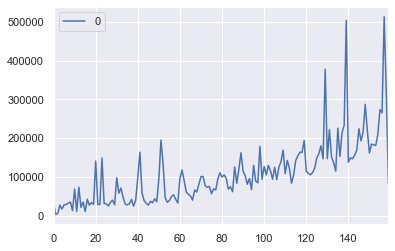

In [216]:
std_A1 = std_calc("A1", sign, lambda_weekly)[1]
pd.DataFrame(std_A1).plot()

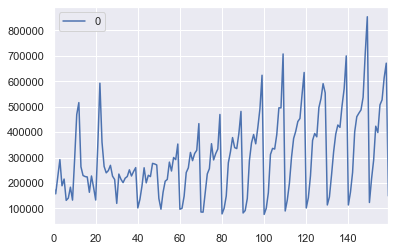

In [215]:
std_B1 = std_calc("B1", sign, lambda_weekly)[1]
pd.DataFrame(std_B1).plot()

### Lambda Mean Plot v.s Queue Size

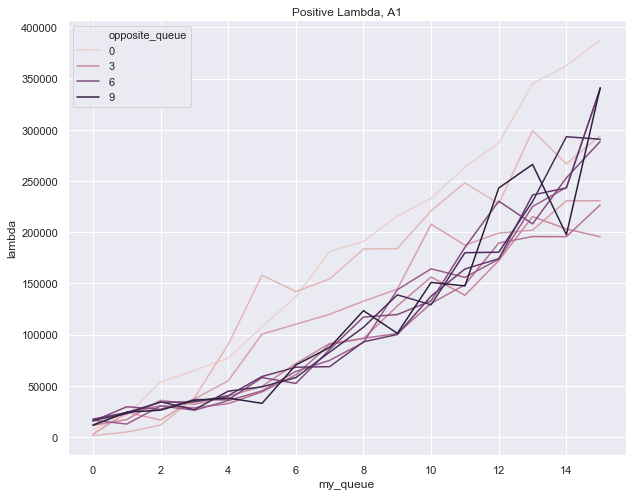

In [273]:
# lambda = list(mean_DF.values.T.flatten())
# my_queue = list(range(mean_DF.shape[0]))*mean_DF.shape[1]
# opposite_queue = [item for sublist in [[i]*mean_DF.shape[0] for i in range(mean_DF.shape[1])] for item in sublist]
lambda_mean = std_calc("A1", 'lambda_positive', lambda_weekly)[2]
mean_DF = pd.DataFrame(np.array(lambda_mean).reshape(16,10))

lambda_mean_df = pd.DataFrame({
    'lambda': list(mean_DF.values.T.flatten()),
    'my_queue': list(range(mean_DF.shape[0]))*mean_DF.shape[1],
    'opposite_queue': [item for sublist in [[i]*mean_DF.shape[0] for i in range(mean_DF.shape[1])] for item in sublist]
})

plt.figure(figsize=(10,8))
ax = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_mean_df)
ax.set_title('Positive Lambda, A1');

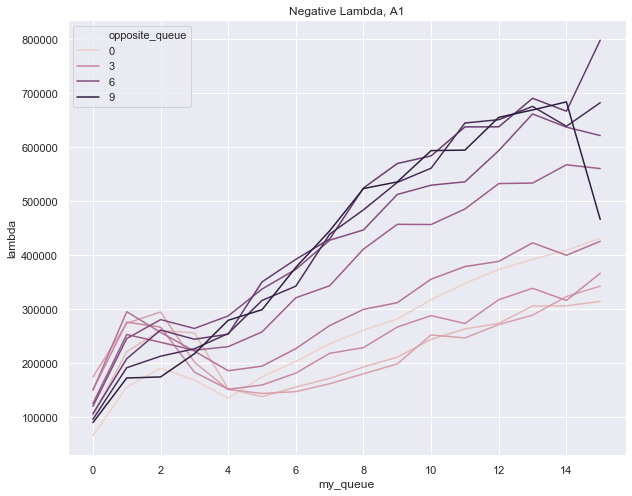

In [272]:
lambda_mean = std_calc("A1", 'lambda_negative', lambda_weekly)[2]
mean_DF = pd.DataFrame(np.array(lambda_mean).reshape(16,10))

lambda_mean_df = pd.DataFrame({
    'lambda': list(mean_DF.values.T.flatten()),
    'my_queue': list(range(mean_DF.shape[0]))*mean_DF.shape[1],
    'opposite_queue': [item for sublist in [[i]*mean_DF.shape[0] for i in range(mean_DF.shape[1])] for item in sublist]
})

plt.figure(figsize=(10,8))
ax = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_mean_df)
ax.set_title('Negative Lambda, A1');

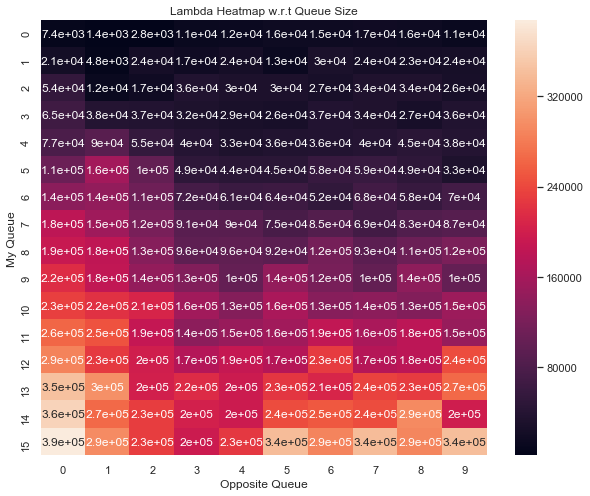

In [242]:
lambda_mean = std_calc("A1", sign, lambda_weekly)[2]
plt.figure(figsize=(10,8))
mean_DF = pd.DataFrame(np.array(lambda_mean).reshape(16,10))
ax = sns.heatmap(mean_DF, annot=True);
ax.set_ylabel('My Queue');
ax.set_xlabel('Opposite Queue');
ax.set_title('Lambda Heatmap w.r.t Queue Size');

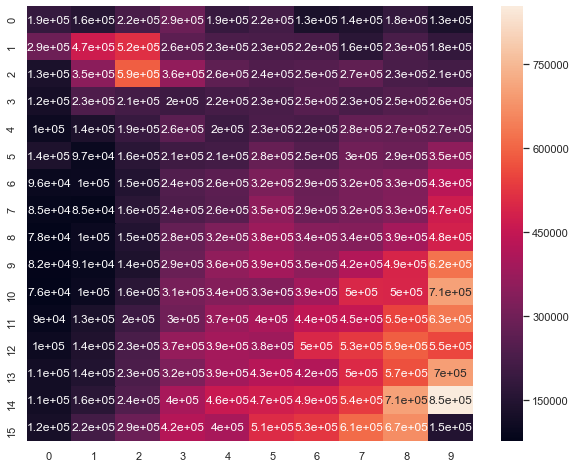

In [218]:
# std dataframe
plt.figure(figsize=(10,8))
std_DF = pd.DataFrame(np.array(std_B1).reshape(16,10))
ax = sns.heatmap(std_DF, annot=True);

In [202]:
flights = sns.load_dataset("flights")
#flights = flights.pivot("month", "year", "passengers")
#ax = sns.heatmap(flights, annot=True, fmt="d")

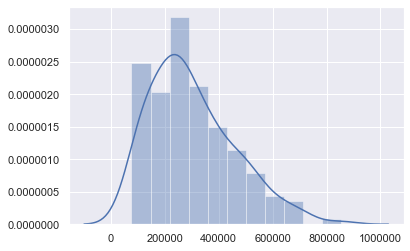

In [174]:
sns.set(color_codes=True)
std = [np.std(arr) for arr in _arr_]
sns.distplot(std);

### Year-Level Plots

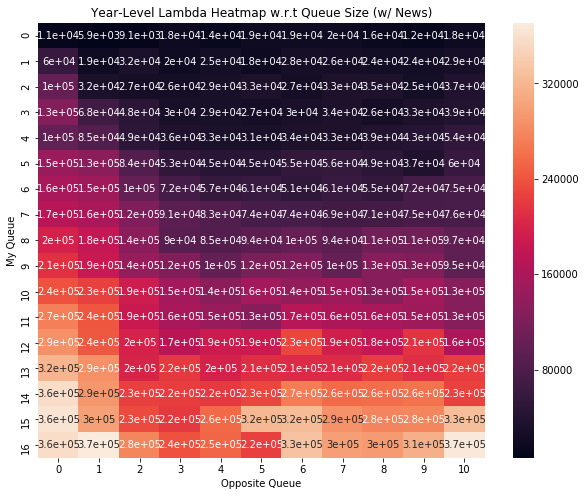

In [135]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(lambda_wiNews_yearly['A1']['lambda_positive'], annot=True);
ax.set_ylabel('My Queue');
ax.set_xlabel('Opposite Queue');
ax.set_title('Year-Level Lambda Heatmap w.r.t Queue Size (w/ News)');

In [138]:
lambda_yearly_wiNews_positive_B2 = pd.DataFrame({
    'lambda': list(lambda_wiNews_yearly["B2"]["lambda_positive"].values.T.flatten()),
    'my_queue': list(range(lambda_wiNews_yearly["B2"]["lambda_positive"].shape[0]))*lambda_wiNews_yearly["B2"]["lambda_positive"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_wiNews_yearly["B2"]["lambda_positive"].shape[0] for i in range(lambda_wiNews_yearly["B2"]["lambda_positive"].shape[1])] for item in sublist]
})

lambda_yearly_wiNews_positive_B1 = pd.DataFrame({
    'lambda': list(lambda_wiNews_yearly["B1"]["lambda_positive"].values.T.flatten()),
    'my_queue': list(range(lambda_wiNews_yearly["B1"]["lambda_positive"].shape[0]))*lambda_wiNews_yearly["B1"]["lambda_positive"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_wiNews_yearly["B1"]["lambda_positive"].shape[0] for i in range(lambda_wiNews_yearly["B1"]["lambda_positive"].shape[1])] for item in sublist]
})

lambda_yearly_wiNews_positive_A1 = pd.DataFrame({
    'lambda': list(lambda_wiNews_yearly["A1"]["lambda_positive"].values.T.flatten()),
    'my_queue': list(range(lambda_wiNews_yearly["A1"]["lambda_positive"].shape[0]))*lambda_wiNews_yearly["A1"]["lambda_positive"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_wiNews_yearly["A1"]["lambda_positive"].shape[0] for i in range(lambda_wiNews_yearly["A1"]["lambda_positive"].shape[1])] for item in sublist]
})

lambda_yearly_wiNews_positive_A2 = pd.DataFrame({
    'lambda': list(lambda_wiNews_yearly["A2"]["lambda_positive"].values.T.flatten()),
    'my_queue': list(range(lambda_wiNews_yearly["A2"]["lambda_positive"].shape[0]))*lambda_wiNews_yearly["A2"]["lambda_positive"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_wiNews_yearly["A2"]["lambda_positive"].shape[0] for i in range(lambda_wiNews_yearly["A2"]["lambda_positive"].shape[1])] for item in sublist]
})

lambda_yearly_wiNews_negative_B2 = pd.DataFrame({
    'lambda': list(lambda_wiNews_yearly["B2"]["lambda_negative"].values.T.flatten()),
    'my_queue': list(range(lambda_wiNews_yearly["B2"]["lambda_negative"].shape[0]))*lambda_wiNews_yearly["B2"]["lambda_negative"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_wiNews_yearly["B2"]["lambda_negative"].shape[0] for i in range(lambda_wiNews_yearly["B2"]["lambda_negative"].shape[1])] for item in sublist]
})

lambda_yearly_wiNews_negative_B1 = pd.DataFrame({
    'lambda': list(lambda_wiNews_yearly["B1"]["lambda_negative"].values.T.flatten()),
    'my_queue': list(range(lambda_wiNews_yearly["B1"]["lambda_negative"].shape[0]))*lambda_wiNews_yearly["B1"]["lambda_negative"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_wiNews_yearly["B1"]["lambda_negative"].shape[0] for i in range(lambda_wiNews_yearly["B1"]["lambda_negative"].shape[1])] for item in sublist]
})

lambda_yearly_wiNews_negative_A1 = pd.DataFrame({
    'lambda': list(lambda_wiNews_yearly["A1"]["lambda_negative"].values.T.flatten()),
    'my_queue': list(range(lambda_wiNews_yearly["A1"]["lambda_negative"].shape[0]))*lambda_wiNews_yearly["A1"]["lambda_negative"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_wiNews_yearly["A1"]["lambda_negative"].shape[0] for i in range(lambda_wiNews_yearly["A1"]["lambda_negative"].shape[1])] for item in sublist]
})

lambda_yearly_wiNews_negative_A2 = pd.DataFrame({
    'lambda': list(lambda_wiNews_yearly["A2"]["lambda_negative"].values.T.flatten()),
    'my_queue': list(range(lambda_wiNews_yearly["A2"]["lambda_negative"].shape[0]))*lambda_wiNews_yearly["A2"]["lambda_negative"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_wiNews_yearly["A2"]["lambda_negative"].shape[0] for i in range(lambda_wiNews_yearly["A2"]["lambda_negative"].shape[1])] for item in sublist]
})

In [139]:
lambda_yearly_woNews_positive_B2 = pd.DataFrame({
    'lambda': list(lambda_woNews_yearly["B2"]["lambda_positive"].values.T.flatten()),
    'my_queue': list(range(lambda_woNews_yearly["B2"]["lambda_positive"].shape[0]))*lambda_woNews_yearly["B2"]["lambda_positive"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_woNews_yearly["B2"]["lambda_positive"].shape[0] for i in range(lambda_woNews_yearly["B2"]["lambda_positive"].shape[1])] for item in sublist]
})

lambda_yearly_woNews_positive_B1 = pd.DataFrame({
    'lambda': list(lambda_woNews_yearly["B1"]["lambda_positive"].values.T.flatten()),
    'my_queue': list(range(lambda_woNews_yearly["B1"]["lambda_positive"].shape[0]))*lambda_woNews_yearly["B1"]["lambda_positive"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_woNews_yearly["B1"]["lambda_positive"].shape[0] for i in range(lambda_woNews_yearly["B1"]["lambda_positive"].shape[1])] for item in sublist]
})

lambda_yearly_woNews_positive_A1 = pd.DataFrame({
    'lambda': list(lambda_woNews_yearly["A1"]["lambda_positive"].values.T.flatten()),
    'my_queue': list(range(lambda_woNews_yearly["A1"]["lambda_positive"].shape[0]))*lambda_woNews_yearly["A1"]["lambda_positive"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_woNews_yearly["A1"]["lambda_positive"].shape[0] for i in range(lambda_woNews_yearly["A1"]["lambda_positive"].shape[1])] for item in sublist]
})

lambda_yearly_woNews_positive_A2 = pd.DataFrame({
    'lambda': list(lambda_woNews_yearly["A2"]["lambda_positive"].values.T.flatten()),
    'my_queue': list(range(lambda_woNews_yearly["A2"]["lambda_positive"].shape[0]))*lambda_woNews_yearly["A2"]["lambda_positive"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_woNews_yearly["A2"]["lambda_positive"].shape[0] for i in range(lambda_woNews_yearly["A2"]["lambda_positive"].shape[1])] for item in sublist]
})

lambda_yearly_woNews_negative_B2 = pd.DataFrame({
    'lambda': list(lambda_woNews_yearly["B2"]["lambda_negative"].values.T.flatten()),
    'my_queue': list(range(lambda_woNews_yearly["B2"]["lambda_negative"].shape[0]))*lambda_woNews_yearly["B2"]["lambda_negative"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_woNews_yearly["B2"]["lambda_negative"].shape[0] for i in range(lambda_woNews_yearly["B2"]["lambda_negative"].shape[1])] for item in sublist]
})

lambda_yearly_woNews_negative_B1 = pd.DataFrame({
    'lambda': list(lambda_woNews_yearly["B1"]["lambda_negative"].values.T.flatten()),
    'my_queue': list(range(lambda_woNews_yearly["B1"]["lambda_negative"].shape[0]))*lambda_woNews_yearly["B1"]["lambda_negative"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_woNews_yearly["B1"]["lambda_negative"].shape[0] for i in range(lambda_woNews_yearly["B1"]["lambda_negative"].shape[1])] for item in sublist]
})

lambda_yearly_woNews_negative_A1 = pd.DataFrame({
    'lambda': list(lambda_woNews_yearly["A1"]["lambda_negative"].values.T.flatten()),
    'my_queue': list(range(lambda_woNews_yearly["A1"]["lambda_negative"].shape[0]))*lambda_woNews_yearly["A1"]["lambda_negative"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_woNews_yearly["A1"]["lambda_negative"].shape[0] for i in range(lambda_woNews_yearly["A1"]["lambda_negative"].shape[1])] for item in sublist]
})

lambda_yearly_woNews_negative_A2 = pd.DataFrame({
    'lambda': list(lambda_woNews_yearly["A2"]["lambda_negative"].values.T.flatten()),
    'my_queue': list(range(lambda_woNews_yearly["A2"]["lambda_negative"].shape[0]))*lambda_woNews_yearly["A2"]["lambda_negative"].shape[1],
    'opposite_queue': [item for sublist in [[i]*lambda_woNews_yearly["A2"]["lambda_negative"].shape[0] for i in range(lambda_woNews_yearly["A2"]["lambda_negative"].shape[1])] for item in sublist]
})

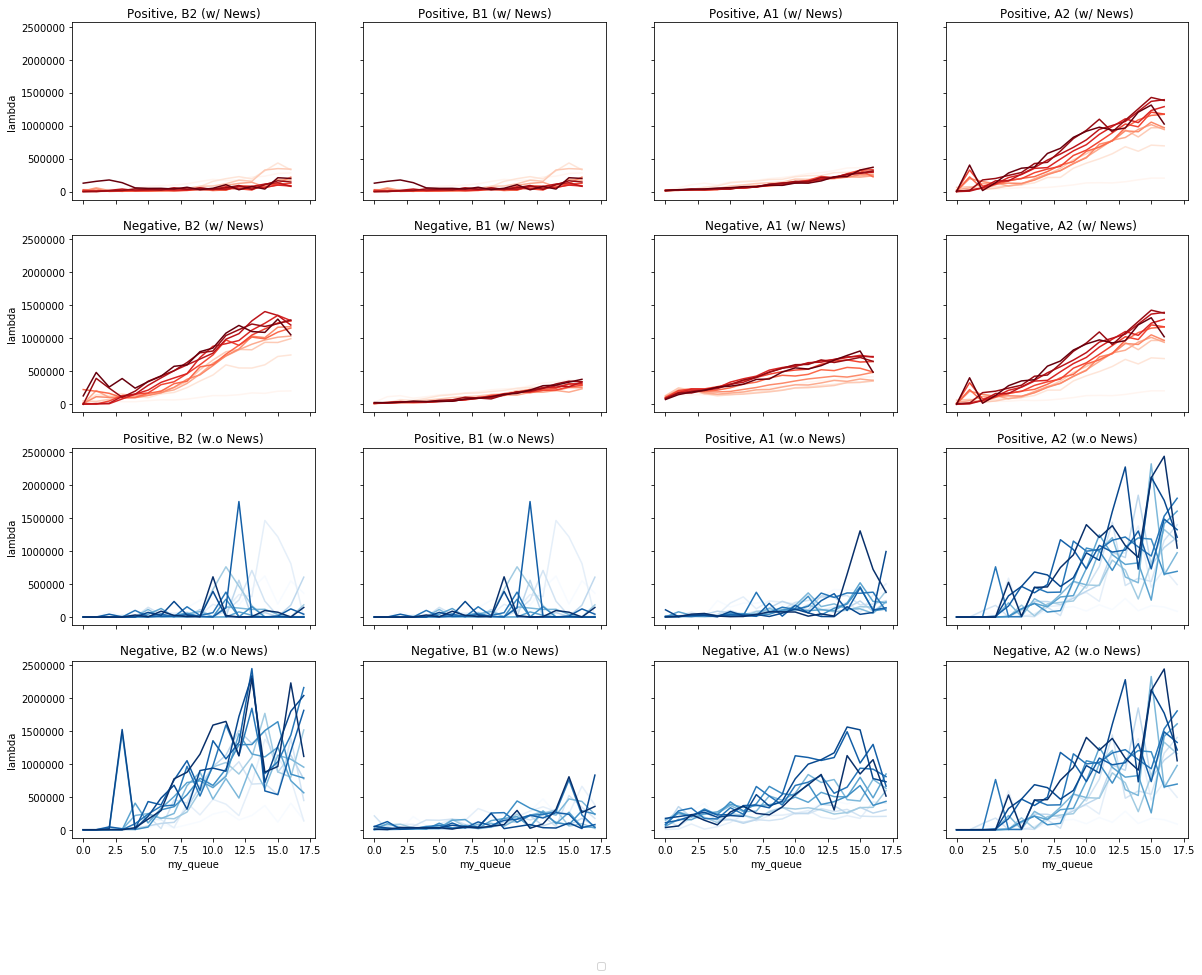

In [153]:
# plot
f, axes = plt.subplots(4, 4, figsize=(20, 15), sharex=True, sharey=True)
# "Paired"

# With News

ax1 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_wiNews_positive_B2, legend = False, palette="Reds", ax=axes[0, 0])
ax1.set_title("Positive, B2 (w/ News)")
ax2 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_wiNews_positive_B2, legend = False, palette="Reds", ax=axes[0, 1])
ax2.set_title("Positive, B1 (w/ News)")
ax3 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_wiNews_positive_A1, legend = False, palette="Reds", ax=axes[0, 2])
ax3.set_title("Positive, A1 (w/ News)")
ax4 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_wiNews_positive_A2, legend = False, palette="Reds", ax=axes[0, 3])
ax4.set_title("Positive, A2 (w/ News)")

ax5 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_wiNews_negative_B2, legend = False, palette="Reds", ax=axes[1, 0])
ax5.set_title("Negative, B2 (w/ News)")
ax6 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_wiNews_negative_B1, legend = False, palette="Reds", ax=axes[1, 1])
ax6.set_title("Negative, B1 (w/ News)")
ax7 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_wiNews_negative_A1, legend = False, palette="Reds", ax=axes[1, 2])
ax7.set_title("Negative, A1 (w/ News)")
ax8 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_wiNews_negative_A2, legend = False, palette="Reds", ax=axes[1, 3])
ax8.set_title("Negative, A2 (w/ News)")

# Without News

ax1 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_woNews_positive_B2, legend = False, palette="Blues", ax=axes[2, 0])
ax1.set_title("Positive, B2 (w.o News)")
ax2 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_woNews_positive_B2, legend = False, palette="Blues", ax=axes[2, 1])
ax2.set_title("Positive, B1 (w.o News)")
ax3 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_woNews_positive_A1, legend = False, palette="Blues", ax=axes[2, 2])
ax3.set_title("Positive, A1 (w.o News)")
ax4 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_woNews_positive_A2, legend = False, palette="Blues", ax=axes[2, 3])
ax4.set_title("Positive, A2 (w.o News)")

ax5 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_woNews_negative_B2, legend = False, palette="Blues", ax=axes[3, 0])
ax5.set_title("Negative, B2 (w.o News)")
ax6 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_woNews_negative_B1, legend = False, palette="Blues", ax=axes[3, 1])
ax6.set_title("Negative, B1 (w.o News)")
ax7 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_woNews_negative_A1, legend = False, palette="Blues", ax=axes[3, 2])
ax7.set_title("Negative, A1 (w.o News)")
ax8 = sns.lineplot(x="my_queue", y="lambda", hue="opposite_queue",data=lambda_yearly_woNews_negative_A2, legend = False, palette="Blues", ax=axes[3, 3])
ax8.set_title("Negative, A2 (w.o News)")

handles, labels = ax.get_legend_handles_labels()
f.legend(handles, labels, loc='lower center')

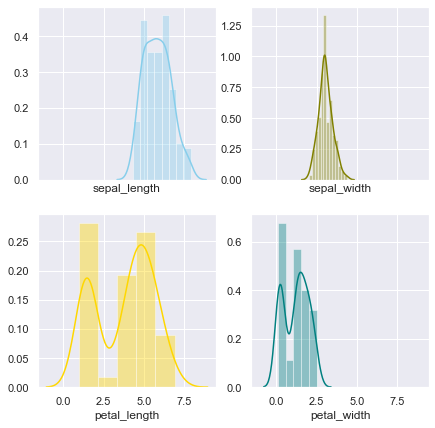

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
# plot
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df["sepal_length"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["sepal_width"] , color="olive", ax=axes[0, 1])
sns.distplot( df["petal_length"] , color="gold", ax=axes[1, 0])
sns.distplot( df["petal_width"] , color="teal", ax=axes[1, 1])
